# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Set the Temperature Unit to Metric
units = "metric"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atafu village
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | isafjordur
Processing Record 4 of Set 1 | polewali
Processing Record 5 of Set 1 | gisborne
Processing Record 6 of Set 1 | labytnangi
Processing Record 7 of Set 1 | chetwayi
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | halden
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | micheweni
Processing Record 14 of Set 1 | aasiaat
Processing Record 15 of Set 1 | imperatriz
Processing Record 16 of Set 1 | saipan
Processing Record 17 of Set 1 | pagar alam
Processing Record 18 of Set 1 | suntar
Processing Record 19 of Set 1 | udachny
Processing Record 20 of Set 1 | nizhnevartovsk
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | yabelo
Processing Rec

Processing Record 41 of Set 4 | ushuaia
Processing Record 42 of Set 4 | ronne
Processing Record 43 of Set 4 | luanda
Processing Record 44 of Set 4 | minas de marcona
Processing Record 45 of Set 4 | crane
Processing Record 46 of Set 4 | kathu
Processing Record 47 of Set 4 | tosontsengel
Processing Record 48 of Set 4 | natchez
Processing Record 49 of Set 4 | kenora
Processing Record 0 of Set 5 | marsh harbour
Processing Record 1 of Set 5 | zheleznodorozhnyy
Processing Record 2 of Set 5 | aldan
Processing Record 3 of Set 5 | antofagasta
Processing Record 4 of Set 5 | yellowknife
Processing Record 5 of Set 5 | poplar bluff
Processing Record 6 of Set 5 | xuddur
Processing Record 7 of Set 5 | hermanus
Processing Record 8 of Set 5 | san pedro pochutla
Processing Record 9 of Set 5 | richards bay
Processing Record 10 of Set 5 | tekane
City not found. Skipping...
Processing Record 11 of Set 5 | mount pearl
Processing Record 12 of Set 5 | nikolayevsk-on-amure
Processing Record 13 of Set 5 | yaren

Processing Record 30 of Set 8 | al mijlad
Processing Record 31 of Set 8 | ryotsu-minato
Processing Record 32 of Set 8 | uturoa
Processing Record 33 of Set 8 | hassi messaoud
Processing Record 34 of Set 8 | newman
Processing Record 35 of Set 8 | mahina
Processing Record 36 of Set 8 | farmville
Processing Record 37 of Set 8 | dhromolaxia
Processing Record 38 of Set 8 | castillos
Processing Record 39 of Set 8 | palmer
Processing Record 40 of Set 8 | san luis de la loma
Processing Record 41 of Set 8 | chinde
Processing Record 42 of Set 8 | silsbee
Processing Record 43 of Set 8 | meadow lakes
Processing Record 44 of Set 8 | guasdualito
Processing Record 45 of Set 8 | coyhaique
Processing Record 46 of Set 8 | saint-philippe
Processing Record 47 of Set 8 | masvingo
Processing Record 48 of Set 8 | aripuana
Processing Record 49 of Set 8 | olot shahri
City not found. Skipping...
Processing Record 0 of Set 9 | myeik
Processing Record 1 of Set 9 | khandyga
Processing Record 2 of Set 9 | fuvahmulah

Processing Record 14 of Set 12 | khuzdar
Processing Record 15 of Set 12 | khanbari
Processing Record 16 of Set 12 | franklin
Processing Record 17 of Set 12 | isabela
Processing Record 18 of Set 12 | new norfolk
Processing Record 19 of Set 12 | guerrero negro
Processing Record 20 of Set 12 | pante makasar
City not found. Skipping...
Processing Record 21 of Set 12 | uliastay
Processing Record 22 of Set 12 | lisakovsk
Processing Record 23 of Set 12 | huazhou
Processing Record 24 of Set 12 | demre
Processing Record 25 of Set 12 | korla
Processing Record 26 of Set 12 | borogontsy
Processing Record 27 of Set 12 | dakhla
Processing Record 28 of Set 12 | hadibu
Processing Record 29 of Set 12 | puerto ayacucho
Processing Record 30 of Set 12 | anatuya
Processing Record 31 of Set 12 | kosong
Processing Record 32 of Set 12 | shibirghan
Processing Record 33 of Set 12 | ciudad bolivar
Processing Record 34 of Set 12 | gebeit
Processing Record 35 of Set 12 | staryye ozinki
Processing Record 36 of Set 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atafu village,-8.5421,-172.5159,26.05,89,100,3.69,TK,1702452748
1,port-aux-francais,-49.3500,70.2167,6.10,93,99,8.99,TF,1702452748
2,isafjordur,66.0755,-23.1240,6.02,70,100,3.60,IS,1702452750
3,polewali,-3.4324,119.3435,28.92,81,80,0.54,ID,1702452750
4,gisborne,-38.6533,178.0042,12.33,78,100,1.10,NZ,1702452750


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,26.05,89,100,3.69,TK,1702452748
1,port-aux-francais,-49.3500,70.2167,6.10,93,99,8.99,TF,1702452748
2,isafjordur,66.0755,-23.1240,6.02,70,100,3.60,IS,1702452750
3,polewali,-3.4324,119.3435,28.92,81,80,0.54,ID,1702452750
4,gisborne,-38.6533,178.0042,12.33,78,100,1.10,NZ,1702452750


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

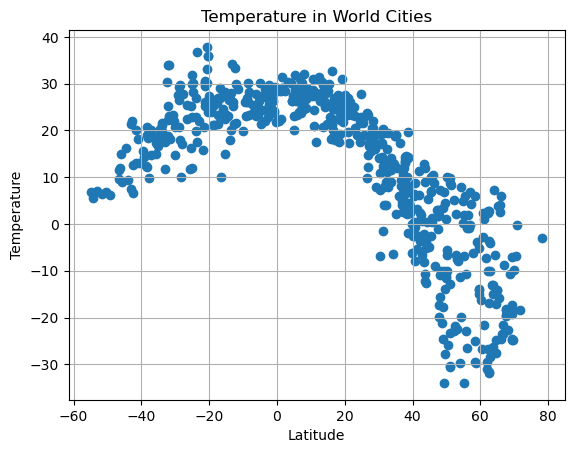

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

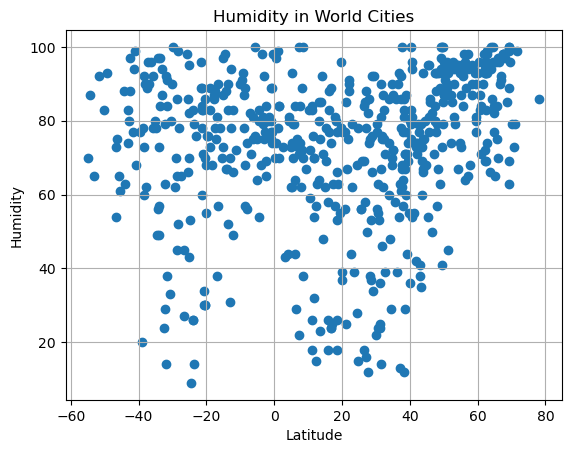

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

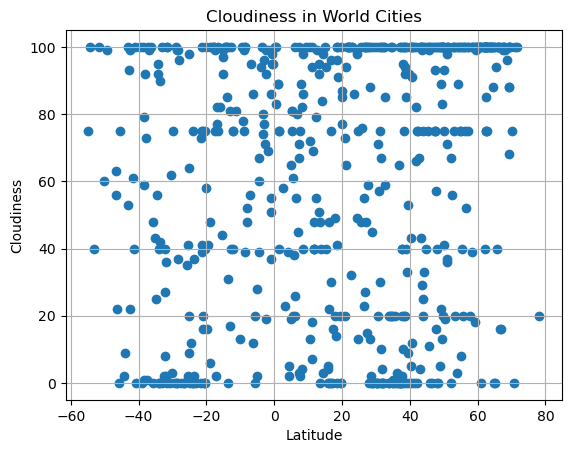

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

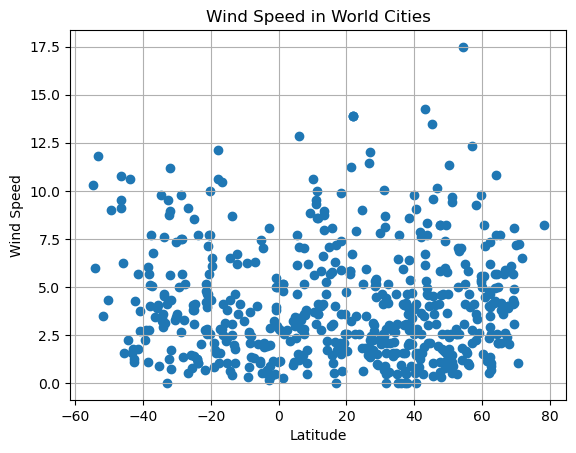

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, y_axis, coordinates, fig_title):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_axis)
    plt.title(fig_title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,isafjordur,66.0755,-23.1240,6.02,70,100,3.60,IS,1702452750
5,labytnangi,66.6572,66.4183,-23.57,90,16,2.59,RU,1702452750
6,chetwayi,10.5333,76.0500,31.01,59,13,5.61,IN,1702452750
9,halden,59.1226,11.3871,-3.76,93,18,2.58,NO,1702452751
13,aasiaat,68.7098,-52.8699,-10.78,85,96,6.10,GL,1702452752


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,26.05,89,100,3.69,TK,1702452748
1,port-aux-francais,-49.3500,70.2167,6.10,93,99,8.99,TF,1702452748
3,polewali,-3.4324,119.3435,28.92,81,80,0.54,ID,1702452750
4,gisborne,-38.6533,178.0042,12.33,78,100,1.10,NZ,1702452750
7,waitangi,-43.9535,-176.5597,9.34,63,9,10.59,NZ,1702452750


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.74041613265325


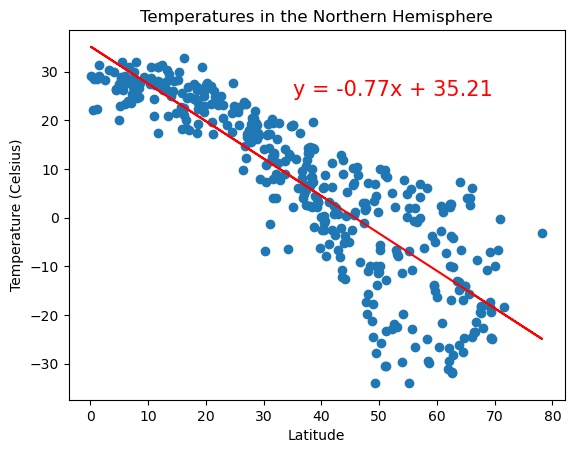

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
y_axis = "Temperature (Celsius)"
fig_title = "Temperatures in the Northern Hemisphere"
coordinates = (35,25)
plot_linear_regression(x_values, y_values, y_axis, coordinates, fig_title)

The r-value is: 0.40941160050024783


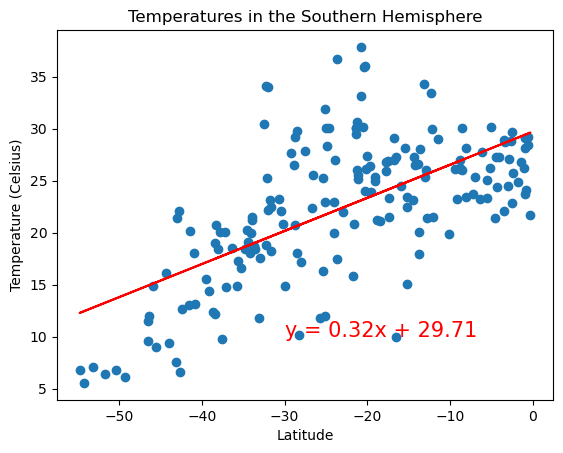

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
y_axis = "Temperature (Celsius)"
fig_title = "Temperatures in the Southern Hemisphere"
coordinates = (-30,10)
plot_linear_regression(x_values, y_values, y_axis, coordinates, fig_title)

**Discussion about the linear relationship:** There seems to be a positive correlation between latitudes and maximum temperatures in the Southern Hemisphere, while the opposite applies to the Northern Hemisphere latitudes and their respective temperatures (a negative correlation).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.16444125238085563


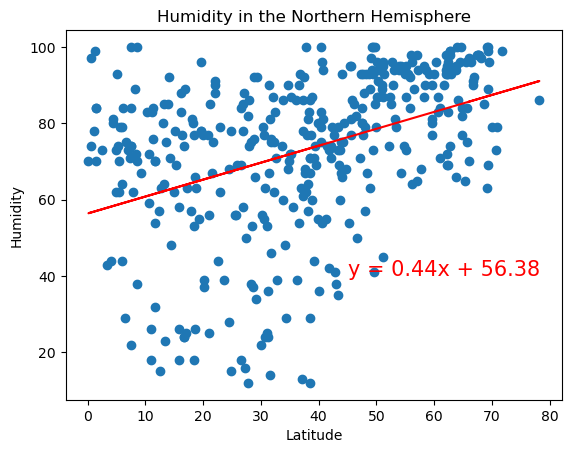

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
y_axis = "Humidity"
fig_title = "Humidity in the Northern Hemisphere"
coordinates = (45,40)
plot_linear_regression(x_values, y_values, y_axis, coordinates, fig_title)

The r-value is: 0.0029836421671130616


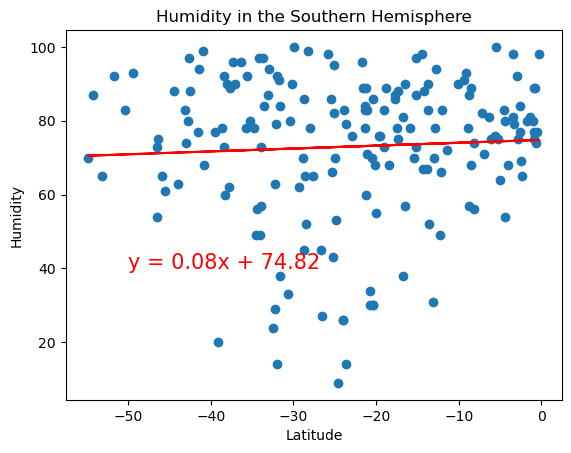

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
y_axis = "Humidity"
fig_title = "Humidity in the Southern Hemisphere"
coordinates = (-50,40)
plot_linear_regression(x_values, y_values, y_axis, coordinates, fig_title)

**Discussion about the linear relationship:** There seems to be a slightly more positive correlation between latitudes and humidity levels in the Northern Hemisphere than the correlation in the Souther Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.052418197929064166


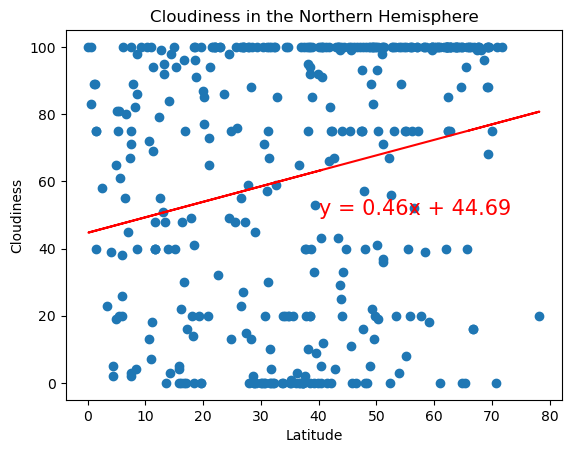

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
y_axis = "Cloudiness"
fig_title = "Cloudiness in the Northern Hemisphere"
coordinates = (40,50)
plot_linear_regression(x_values, y_values, y_axis, coordinates, fig_title)

The r-value is: 0.024518254658890848


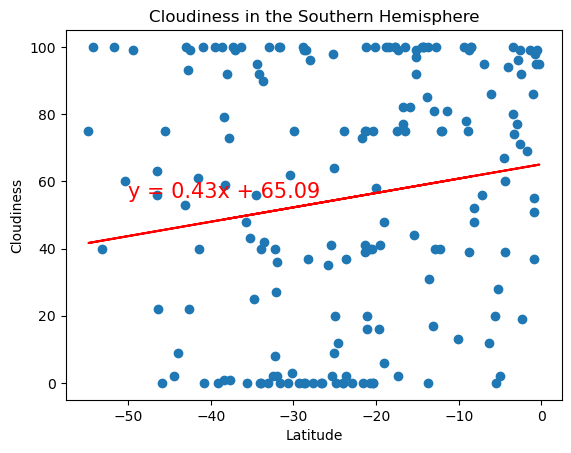

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
y_axis = "Cloudiness"
fig_title = "Cloudiness in the Southern Hemisphere"
coordinates = (-50,55)
plot_linear_regression(x_values, y_values, y_axis, coordinates, fig_title)

**Discussion about the linear relationship:** There seems to be a slightly more positive correlation between latitudes and cloudiness in the Northern Hemisphere than the correlation in the Southern Hemisphere. However, the difference in correlation between the hemispheres is almost negligible.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 2.7447074814641424e-05


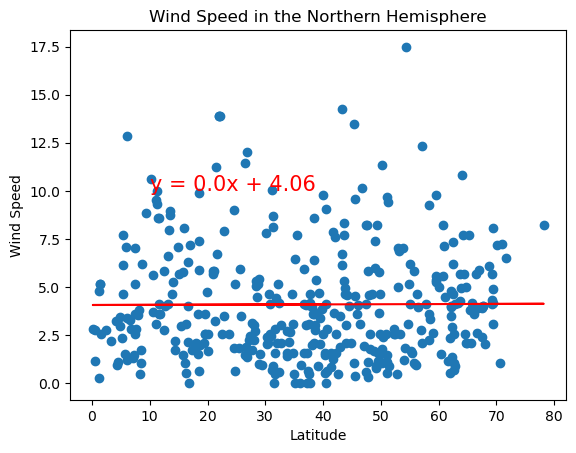

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
y_axis = "Wind Speed"
fig_title = "Wind Speed in the Northern Hemisphere"
coordinates = (10,10)
plot_linear_regression(x_values, y_values, y_axis, coordinates, fig_title)

The r-value is: 0.0919859725200247


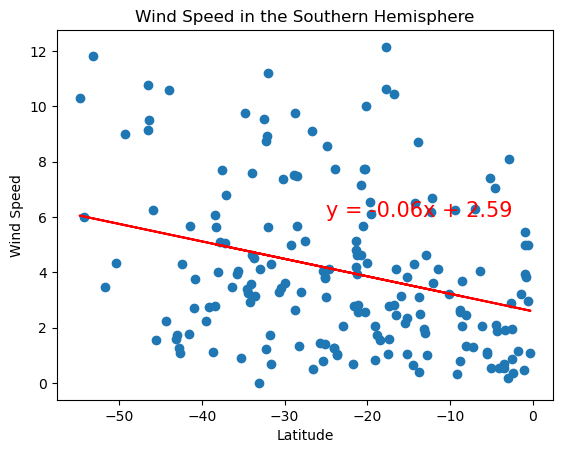

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
y_axis = "Wind Speed"
fig_title = "Wind Speed in the Southern Hemisphere"
coordinates = (-25,6)
plot_linear_regression(x_values, y_values, y_axis, coordinates, fig_title)

**Discussion about the linear relationship:** There seems to be a very small positive (almost zero) correlation between latitudes and wind speed in the Northern Hemipshere, whereas the correlation in the Southern Hemisphere is also small but negative.